# Singular Value Decomposition (SVD)

**Разложение по сингулярным значениям** (SVD) — это рабочая лошадка в приложениях проекции наименьших квадратов, которая
составляют основу для многих статистических методов и методов машинного обучения.

После определения SVD мы опишем, как он подключается к

- **четыре фундаментальных пространства** линейной алгебры
- недоопределенные и переопределенные **регрессии наименьших квадратов**
- **Анализ главных компонентов** (PCA)


Как и анализ главных компонентов (PCA), SVD можно рассматривать как процедуру сокращения данных, которая представляет существенные закономерности путем проецирования данных на ограниченный набор факторов.


## Настройка

Пусть $X$ — матрица $m\times n$ ранга $p$.

Обязательно $p\leq\min(m,n)$.

На протяжении большей части этой лекции мы будем думать о $X$ как о матрице **данных**, в которой

- в каждом столбце указано **индивидуальное** – период времени или человек, в зависимости от приложения.
- каждая строка представляет собой **случайную величину**, описывающую атрибут периода времени или человека, в зависимости от приложения


Нас будут интересовать две ситуации

- **1** случай (short and fat) в котором $ m << n $, так что столбцов (отдельных лиц) намного больше, чем строк (атрибутов).
- **2** случай (tall and skinny), в котором $m >> n$, так что строк (атрибутов) гораздо больше, чем столбцов (отдельных лиц).


В обеих ситуациях мы применим **разложение по сингулярным значениям** $X$.

В случае $ m < < n $, когда особей $ n $ гораздо больше, чем атрибутов $ m $, мы можем вычислить моменты выборки совместного распределения, взяв средние значения по наблюдениям функций наблюдений.

В этом случае $ m < < n $ мы будем искать **шаблоны**, используя **разложение по сингулярным значениям** для выполнения **анализа главных компонентов** (PCA).

В случае $ m >> n $, когда атрибутов $ m $ намного больше, чем индивидов $ n $, и когда мы находимся в настройке временного ряда, в которой $ n $ равно количеству периодов времени, охватываемых набором данных $ X $, мы поступим другим способом.

Мы снова будем использовать **разложение по сингулярным значениям**, но теперь для построения **разложения по динамическим режимам** (DMD).

## Singular Value Decomposition


**Разложение по сингулярным значениям** $ m \times n $ матрицы $ X $ ранга $ p \leq \min(m,n) $ есть

<a id='equation-eq-svd101'></a>
$$
X  = U \Sigma V^\top \tag{5.1}
$$

where

$$
\begin{aligned}
UU^\top  &  = I  &  \quad U^\top  U = I \cr
VV^\top  & = I & \quad V^\top  V = I
\end{aligned}
$$

and

-$U$ — $m\times m$ ортогональная матрица **левых сингулярных векторов** матрицы $X$
- Столбцы $U$ являются собственными векторами $X X^\top$
- $V$ — это $n\times n$ ортогональная матрица **правых сингулярных векторов** матрицы $X$
- Столбцы $V$ являются собственными векторами $X^\top X$
- $\Sigma$ — $m\times n$-матрица, в которой первые $p$ места на ее главной диагонали являются положительными числами $\sigma_1, \sigma_2, \ldots, \sigma_p$, называемыми **сингулярными значениями**; все остальные записи $\Sigma$ равны нулю
- Сингулярные значения $p$ являются положительными квадратными корнями из собственных значений матрицы $m\times m$ $X X^\top$, а также матрицы $n\times n$ $X^\top X$
- Мы принимаем соглашение, согласно которому, когда $ U $ является комплексной матрицей, $ U^\top $ обозначает **сопряженное транспонирование** или **эрмитово транспонирование** $ U $, что означает, что
$ U_{ij}^\top$ — комплексно-сопряженный элемент $U_{ji}$.
- Аналогично, когда $V$ является комплексной матрицей, $V^\top$ обозначает **сопряженное транспонирование** или **эрмитово транспонирование** $V $.


Матрицы $U,\Sigma,V$ влекут за собой линейные преобразования, изменяющие форму векторов следующими способами:

- умножение векторов на унитарные матрицы $U$ и $V$ **поворачивает** их, но оставляет **углы между векторами** и **длины векторов** неизменными.
- умножение векторов на диагональную матрицу $\Sigma$ оставляет **углы между векторами** неизменными, но **перемасштабирует** векторы.


Таким образом, представление [(5.1)](#equation-eq-svd101) утверждает, что умножение $ n \times 1$ вектора $y$ на $m \times n$ матрицу $X$
сводится к последовательному выполнению следующих трёх умножений $y$:

- **вращение** $ y $ путем вычисления $ V^\top y $
- **масштабирование** $ V^\top y $ путем умножения на $ \Sigma $
- **вращение** $ \Sigma V^\top y $ путем умножения на $ U $


Такая структура матрицы $m\times n$ $X$ открывает двери для построения систем
**кодеров** и **декодеров** данных.

Таким образом,

- $V^\top y$ — кодировщик
- $\Sigma$ — оператор, применяемый к закодированным данным
— $U$ — декодер, который будет применяться к выходу применения оператора $\Sigma$ к закодированным данным


Мы применим этот круг идей позже в этой лекции, когда будем изучать декомпозицию по динамическому режиму.


То, что мы описали выше, называется **полной** СВД.

В **полном** SVD формы $U$, $\Sigma$ и $V$ имеют вид $\left(m, m\right)$, $\left(m, n\right)$, $\left(n, n\right)$ соответственно.

Позже мы также опишем **экономную** или **уменьшенную** СВД.

Прежде чем мы приступим к изучению **уменьшенного** СВД, скажем немного больше о свойствах **полного** СВД.

## Четыре фундаментальных подпространства

Пусть $ {\mathcal C} $ обозначает пространство столбцов, $ {\mathcal N} $ обозначает нулевое пространство и $ {\mathcal R} $ обозначает пространство строк.

Начнем с напоминания о четырех фундаментальных подпространствах $m\times n$
матрица $X$ ранга $p$.

— **Пространство столбцов** $X$, обозначаемое ${\mathcal C}(X)$, представляет собой диапазон столбцов $X$, т. е. всех векторов $y$, которые можно записать как линейные комбинации столбцов $X$. Его размерность $p$.
- **Нулевое пространство** $ X $, обозначаемое $ {\mathcal N}(X) $, состоит из всех векторов $ y $, удовлетворяющих условиям
$Ху=0$. Его размерность $n-p$.
- **Пространство строк** $ X $, обозначаемое $ {\mathcal R}(X) $, является пространством столбцов $ X^\top $. Он состоит из всех
векторы $z$, которые можно записать как линейные комбинации строк $X$. Его размерность $p$.
- **Левое нулевое пространство** $ X $, обозначаемое $ {\mathcal N}(X^\top ) $, состоит из всех векторов $ z $ таких, что
$ X^\top z =0 $. Его размерность $m-p$.

Для полной СВД матрицы $X$ матрица $U$ левых сингулярных векторов и матрица $V$ правых сингулярных векторов содержат ортогональные базисы для всех четырёх подпространств.

Они образуют две пары ортогональных подпространств, что мы сейчас опишем.

Let $ u_i, i = 1, \ldots, m $ be the $ m $ column vectors of $ U $ and let
$ v_i, i = 1, \ldots, n $ be the $ n $ column vectors of $ V $.

Давайте запишем полный SVD X как

<a id='equation-eq-fullsvdpartition'></a>
$$
X = \begin{bmatrix} U_L & U_R \end{bmatrix} \begin{bmatrix} \Sigma_p & 0 \cr 0 & 0 \end{bmatrix}
     \begin{bmatrix} V_L & V_R \end{bmatrix}^\top \tag{5.2}
$$
где $\Sigma_p$ — диагональная матрица $p\times p$ с сингулярными значениями $p$ на диагонали и
$$
\begin{aligned}
U_L & = \begin{bmatrix}u_1 & \cdots  & u_p \end{bmatrix},  \quad U_R  = \begin{bmatrix}u_{p+1} & \cdots u_m \end{bmatrix}  \cr
V_L & = \begin{bmatrix}v_1 & \cdots  & v_p \end{bmatrix} , \quad U_R  = \begin{bmatrix}v_{p+1} & \cdots u_n \end{bmatrix}
\end{aligned}
$$

Представление [(5.2)](#equation-eq-fullsvdpartition) подразумевает, что

$$
X \begin{bmatrix} V_L & V_R \end{bmatrix} = \begin{bmatrix} U_L & U_R \end{bmatrix} \begin{bmatrix} \Sigma_p & 0 \cr 0 & 0 \end{bmatrix}
$$

или


<a id='equation-eq-xfour1a'></a>
$$
\begin{aligned}
X V_L & = U_L \Sigma_p \cr
X V_R & = 0
\end{aligned} \tag{5.3}
$$

или


<a id='equation-eq-orthoortho1'></a>
$$
\begin{aligned}
X v_i & = \sigma_i u_i , \quad i = 1, \ldots, p \cr
X v_i & = 0 ,  \quad i = p+1, \ldots, n
\end{aligned} \tag{5.4}
$$

Equations [(5.4)](#equation-eq-orthoortho1) tell how the transformation $ X $ maps a pair of orthonormal  vectors $ v_i, v_j $ for $ i $ and $ j $ both less than or equal to the rank $ p $ of $ X $ into a pair of orthonormal vectors $ u_i, u_j $.

Equations [(5.3)](#equation-eq-xfour1a) assert that

$$
\begin{aligned}
{\mathcal C}(X) & = {\mathcal C}(U_L) \cr
{\mathcal N}(X) & = {\mathcal C} (V_R)
\end{aligned}
$$

Taking transposes on both sides of representation [(5.2)](#equation-eq-fullsvdpartition) implies

$$
X^\top  \begin{bmatrix} U_L & U_R \end{bmatrix} = \begin{bmatrix} V_L & V_R \end{bmatrix} \begin{bmatrix} \Sigma_p & 0 \cr 0 & 0 \end{bmatrix}
$$

или


<a id='equation-eq-xfour1b'></a>
$$
\begin{aligned}
X^\top  U_L & = V_L \Sigma_p \cr
X^\top  U_R & = 0
\end{aligned} \tag{5.5}
$$

или


<a id='equation-eq-orthoortho2'></a>
$$
\begin{aligned}
X^\top  u_i & = \sigma_i v_i, \quad i=1, \ldots, p \cr
X^\top  u_i & = 0 \quad i= p+1, \ldots, m
\end{aligned} \tag{5.6}
$$

Обратите внимание, как уравнения [(5.6)](#equation-eq-orthoortho2) утверждают, что преобразование $X^\top$ отображает пару различных ортонормированных векторов $u_i, u_j$ для $i$ и $j$, которые меньше или равны рангу $p$ $X$, в пару различных ортонормированных векторов $v_i, v_j$.

Equations [(5.5)](#equation-eq-xfour1b) assert that

$$
\begin{aligned}
{\mathcal R}(X) & \equiv  {\mathcal C}(X^\top ) = {\mathcal C} (V_L) \cr
{\mathcal N}(X^\top ) & = {\mathcal C}(U_R)
\end{aligned}
$$
Таким образом, в совокупности системы уравнений [(5.3)](#equation-eq-xfour1a) и [(5.5)](#equation-eq-xfour1b)
опишите четыре фундаментальных подпространства $X$ следующими способами:


<a id='equation-eq-fourspacesvd'></a>
$$
\begin{aligned}
{\mathcal C}(X) & = {\mathcal C}(U_L) \cr
{\mathcal N}(X^\top ) & = {\mathcal C}(U_R) \cr
{\mathcal R}(X) & \equiv  {\mathcal C}(X^\top ) = {\mathcal C} (V_L) \cr
{\mathcal N}(X) & = {\mathcal C} (V_R) \cr

\end{aligned} \tag{5.7}
$$

Поскольку $U$ и $V$ являются ортонормированными матрицами, набор [(5.7)](#equation-eq-fourspacesvd) утверждает, что

— $U_L$ — ортонормированный базис пространства столбцов $X$
- $U_R$ — ортонормированный базис нуль-пространства $X^\top$
- $V_L$ — ортонормированный базис для пространства строк $X$
— $V_R$ — ортонормированный базис нулевого пространства $X$


Мы проверили четыре утверждения в [(5.7)](#equation-eq-fourspacesvd), просто выполнив умножения, требуемые в правой части [(5.2)](#equation-eq-fullsvdpartition), и прочитав их.

Утверждения в [(5.7)](#equation-eq-fourspacesvd) и тот факт, что $U$ и $V$ являются унитарными (т.е. ортонормированными) матрицами, подразумевают
что

- пространство столбцов $X$ ортогонально пустому пространству $X^\top$
- нулевое пространство $X$ ортогонально пространству строк $X$


Иногда эти свойства описываются следующими двумя парами ортогональных дополнительных подпространств:

- $ {\mathcal C}(X) $ is the orthogonal complement of $ {\mathcal N}(X^\top ) $  
- $ {\mathcal R}(X) $ is the orthogonal complement  $ {\mathcal N}(X) $  


Давайте сделаем пример.

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

Having imported these modules, let’s do the example.

In [3]:
np.set_printoptions(precision=2)

# Define the matrix
A = np.array([[1, 2, 3, 4, 5, 1],
              [2, 3, 4, 5, 6, 1],
              [3, 4, 5, 6, 7, 1],
              [4, 5, 6, 7, 8, 1],
              [5, 6, 7, 8, 9, 1]])

# Вычислите SVD матрицы c помощью np.linalg.svd
U,S,VT = np.linalg.svd(A)

SDiag = np.zeros((U.shape[0],VT.shape[0]))
SDiag[np.arange(U.shape[0]),np.arange(U.shape[0])]=S

# Вычислить ранг матрицы linalg.matrix_rank
p = np.linalg.matrix_rank(A)


UL = U[:p]
UR = U[p:]
VL = VT[:p]
VR = VT[p:]

# Вычислите 4 фундаментальных пространства
row_space = VL
col_space = UL
null_space = VR
left_null_space = UR

# # вывести все на печать
print("U:\n",U)
print("Column space:\n", col_space)
print("Left null space:\n", left_null_space)
print("V.T:\n",  VT)
print("Row space:\n",  row_space)
print("Right null space:\n",  null_space)

U:
 [[ 0.27  0.73  0.25  0.22  0.54]
 [ 0.35  0.42 -0.11  0.25 -0.79]
 [ 0.43  0.11 -0.66 -0.57  0.17]
 [ 0.51 -0.19  0.68 -0.47 -0.12]
 [ 0.59 -0.5  -0.15  0.58  0.2 ]]
Column space:
 [[ 0.27  0.73  0.25  0.22  0.54]
 [ 0.35  0.42 -0.11  0.25 -0.79]]
Left null space:
 [[ 0.43  0.11 -0.66 -0.57  0.17]
 [ 0.51 -0.19  0.68 -0.47 -0.12]
 [ 0.59 -0.5  -0.15  0.58  0.2 ]]
V.T:
 [[ 0.27  0.35  0.43  0.51  0.59  0.08]
 [-0.7  -0.41 -0.12  0.17  0.46  0.29]
 [-0.66  0.58  0.33  0.   -0.26 -0.23]
 [ 0.01 -0.39  0.41  0.55 -0.57  0.22]
 [-0.02 -0.46  0.41 -0.13  0.2  -0.75]
 [ 0.03 -0.07  0.6  -0.62  0.06  0.49]]
Row space:
 [[ 0.27  0.35  0.43  0.51  0.59  0.08]
 [-0.7  -0.41 -0.12  0.17  0.46  0.29]]
Right null space:
 [[-0.66  0.58  0.33  0.   -0.26 -0.23]
 [ 0.01 -0.39  0.41  0.55 -0.57  0.22]
 [-0.02 -0.46  0.41 -0.13  0.2  -0.75]
 [ 0.03 -0.07  0.6  -0.62  0.06  0.49]]


## Теорема Эккарта-Янга

Предположим, что мы хотим построить наилучшее приближение ранга $r$ $m\times n$-матрицы $X$.

Под наилучшей мы понимаем матрицу $X_r$ ранга $r<p$, которая среди всех матриц ранга $r$ минимизирует

$$
|| X - X_r ||
$$

где $ || \cdot || $ обозначает норму матрицы $X$ и где $X_r$ принадлежит пространству всех матриц ранга $r$
размерности $m\times n$.

Три популярные **матричные нормы** $ m \times n$ матрицы $ X $ можно выразить через сингулярные значения $ X $

- **спектральная** или $l^2$ норма $ || X ||_2 = \max_{||y|| \neq 0} \frac{||X y ||}{||y||} = \sigma_1 $
- норма **Фробениуса** $ ||X ||_F = \sqrt{\sigma_1^2 + \cdots + \sigma_p^2} $
- **ядерная** норма $ || X ||_N = \sigma_1 + \cdots + \sigma_p $

Теорема Эккарта-Янга утверждает, что для каждой из этих трех норм матрица $r$ одного и того же ранга является наилучшей и что она равна

<a id='equation-eq-ekart'></a>
$$
\hat X_r = \sigma_1 U_1 V_1^\top  + \sigma_2 U_2 V_2^\top  + \cdots + \sigma_r U_r V_r^\top \tag{5.8}
$$

Это очень мощная теорема, которая гласит, что мы можем взять нашу $m\times n$матрицу $X$, которая не в полном ранге, и лучше всего аппроксимировать ее матрицей $p\times p$ полного ранга через SVD.

Более того, если некоторые из этих $p$ сингулярных значений несут больше информации, чем другие, и если мы хотим иметь наибольшее количество информации с наименьшим количеством данных, мы можем взять $r$ ведущие сингулярные значения, упорядоченные по величине.

Мы расскажем об этом подробнее позже, когда представим анализ главных компонентов.

Вы можете прочитать о теореме Эккарта-Янга и некоторых ее применениях [здесь] (https://en.wikipedia.org/wiki/Low-rank_approximation).

Мы будем использовать эту теорему, когда будем обсуждать анализ главных компонентов (PCA), а также динамическую модовую декомпозицию (DMD).

## Полные и уменьшенные СВД

До сих пор мы описывали свойства **полного** SVD, в котором формы $U$, $\Sigma$ и $V$ имеют вид $\left(m, m\right)$, $\left(m, n\right)$, $\left(n, n\right)$ соответственно.

Существует альтернативное бухгалтерское соглашение, называемое **экономичным** или **уменьшенным** SVD, в котором формы $U, \Sigma$ и $V$ отличаются от того, что они имеют в полном SVD.

Таким образом, обратите внимание: поскольку мы предполагаем, что $X$ имеет ранг $p$, существуют только $p$ ненулевые сингулярные значения, где $p=\textrm{rank}(X)\leq\min\left(m, n\right)$.

**Приведенный** SVD использует этот факт для выражения $U$, $\Sigma$ и $V$ в виде матриц с формами $\left(m, p\right)$, $\left(p, p\right)$, $\left( n, p\right)$.

Про уменьшенную и полную СВД можно прочитать здесь.
[https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

Для полной SVD,

$$
\begin{aligned}
UU^\top  &  = I  &  \quad U^\top  U = I \cr
VV^\top  & = I & \quad V^\top  V = I
\end{aligned}
$$

Bоднако не все эти свойства справедливы для **уменьшенной** СВД.

Какие свойства сохраняются, зависит от того, находимся ли мы в случае **высоких-худых** или в случае **низких-толстых**.

- В **высоком-худом** случае, когда $m > > n$, для **уменьшенной** СВД


$$
\begin{aligned}
UU^\top  &  \neq I  &  \quad U^\top  U = I \cr
VV^\top  & = I & \quad V^\top  V = I
\end{aligned}
$$

- **Короткий** случай, когда $ m < < n $, для **уменьшенного** SVD


$$
\begin{aligned}
UU^\top  &  = I  &  \quad U^\top  U = I \cr
VV^\top  & = I & \quad V^\top  V \neq I
\end{aligned}
$$

Когда мы ниже будем изучать динамическую модовую декомпозицию, мы захотим запомнить эти свойства, когда будем использовать сокращенный SVD для вычисления некоторых представлений DMD.

Давайте выполним упражнение, чтобы сравнить **полные** и **уменьшенные** SVD.
Чтобы просмотреть,

- in a **full** SVD  
  - $ U $ is $ m \times m $  
  - $ \Sigma $ is $ m \times n $  
  - $ V $ is $ n \times n $  
- in a **reduced** SVD  
  - $ U $ is $ m \times p $  
  - $ \Sigma $ is $ p\times p $  
  - $ V $ is $ n \times p $  

Сначала рассмотрим случай, когда $m = 5 > n = 2$.

(Это небольшой пример случая **высокий-худой**, который будет интересовать нас, когда мы будем изучать **Динамическое разложение по модам** ниже.)

In [4]:
import numpy as np
X = np.random.rand(5,2)
U, S, V = np.linalg.svd(X)  # full SVD
Uhat, Shat, Vhat = np.linalg.svd(X,full_matrices=False) # economy SVD
print('U, S, V =',U.shape, S.shape, V.shape)
print('Uh, Sh, Vh =',Uhat.shape, Shat.shape, Vhat.shape)

U, S, V = (5, 5) (2,) (2, 2)
Uh, Sh, Vh = (5, 2) (2,) (2, 2)


In [5]:
rr = np.linalg.matrix_rank(X)
print(f'rank of X = {rr}')

rank of X = 2


**Свойства:**

- Где $U$ строится через полный СВД, $U^\top U = I_{m\times m} $ и $ U U^\top = I_{m \times m} $
- Там, где $\hat U$ строится посредством редуцированного СВД, хотя $\hat U^\top\hat U = I_{p\times p}$, бывает, что $\hat U \hat U^\top \neq I_{m \times m} $


Мы проиллюстрируем эти свойства для нашего примера с помощью следующих ячеек кода.

In [7]:
UTU =  U.T @ U
UUT =  U @ U.T
print('UUT, UTU = ')
UUT.round(), UTU.round()

UUT, UTU = 


(array([[ 1., -0.,  0.,  0.,  0.],
        [-0.,  1., -0.,  0., -0.],
        [ 0., -0.,  1., -0.,  0.],
        [ 0.,  0., -0.,  1., -0.],
        [ 0., -0.,  0., -0.,  1.]]),
 array([[ 1., -0.,  0., -0.,  0.],
        [-0.,  1., -0.,  0., -0.],
        [ 0., -0.,  1., -0.,  0.],
        [-0.,  0., -0.,  1., -0.],
        [ 0., -0.,  0., -0.,  1.]]))

In [9]:
UhatUhatT =  Uhat @ Uhat.T
UhatTUhat =  Uhat.T @ Uhat
print('UhatUhatT, UhatTUhat= ')
UhatUhatT.round(3), UhatTUhat.round(3)

UhatUhatT, UhatTUhat= 


(array([[ 0.14,  0.13,  0.1 ,  0.3 ,  0.01],
        [ 0.13,  0.14, -0.02,  0.32, -0.02],
        [ 0.1 , -0.02,  0.94, -0.02,  0.21],
        [ 0.3 ,  0.32, -0.02,  0.73, -0.05],
        [ 0.01, -0.02,  0.21, -0.05,  0.05]]),
 array([[ 1., -0.],
        [-0.,  1.]]))

**Примечания:**

Ячейки выше иллюстрируют применение опций `full_matrices=True` и `full_matrices=False`.
Использование `full_matrices=False` возвращает уменьшенное разложение по сингулярным значениям.

И **полный**, и **уменьшенный** SVD точно разлагают $ m \times n$ матрицу $ X $

Когда мы будем изучать динамическое разложение по модам ниже, нам будет важно помнить предыдущие свойства полных и уменьшенных SVD в таких случаях с высоким ростом.

Теперь обратимся к короткому делу.

Чтобы проиллюстрировать этот случай, мы установим $ m = 2 < 5 = n $ и вычислим как полные, так и сокращенные SVD.

In [10]:
import numpy as np
X = np.random.rand(2,5)
U, S, V = np.linalg.svd(X)  # full SVD
Uhat, Shat, Vhat = np.linalg.svd(X,full_matrices=False) # economy SVD
print('U, S, V = ')
U, S, V

U, S, V = 


(array([[-0.67, -0.74],
        [-0.74,  0.67]]),
 array([1.76, 0.46]),
 array([[-0.47, -0.26, -0.21, -0.34, -0.75],
        [-0.48,  0.43, -0.42,  0.64, -0.02],
        [-0.41,  0.25,  0.87,  0.1 , -0.12],
        [ 0.07, -0.73,  0.15,  0.65, -0.13],
        [-0.62, -0.39, -0.06, -0.23,  0.64]]))

In [11]:
print('Uhat, Shat, Vhat = ')
Uhat, Shat, Vhat

Uhat, Shat, Vhat = 


(array([[-0.67, -0.74],
        [-0.74,  0.67]]),
 array([1.76, 0.46]),
 array([[-0.47, -0.26, -0.21, -0.34, -0.75],
        [-0.48,  0.43, -0.42,  0.64, -0.02]]))

Let’s verify that our reduced SVD accurately represents $ X $

In [12]:
SShat=np.diag(Shat)
np.allclose(X, Uhat@SShat@Vhat)

True

## Полярное разложение

**Приведенное** разложение по сингулярным значениям (SVD) $ X $ связано с **полярным разложением** $ X $$

$$
X  = SQ
$$

где

$$
\begin{aligned}
 S & = U\Sigma U^\top  \cr
Q & = U V^\top
\end{aligned}
$$

Здесь

- $ S $ is  an $ m \times m $  **symmetric** matrix  
- $ Q $ is an $ m \times n $  **orthogonal** matrix  


и в нашей reduced SVD

- $ U $ is an $ m \times p $ orthonormal matrix  
- $ \Sigma $ is a $ p \times p $ diagonal matrix  
- $ V $ is an $ n \times p $ orthonormal  

## Приложение: анализ главных компонентов (PCA)

Начнем со случая, когда $n>>m$, так что особей $n$ у нас гораздо больше, чем атрибутов $m$.

Матрица $ X $ является **короткой и толстой** в случае $ n >> m $, в отличие от случая **высокой и тощей** с $ m >> n $, который будет обсуждаться позже.

Мы рассматриваем $X$ как матрицу $m\times n$ **данных**:

$$
X = \begin{bmatrix} X_1 \mid X_2 \mid \cdots \mid X_n\end{bmatrix}
$$

где для $j = 1, \ldots, n$ вектор-столбец $X_j = \begin{bmatrix}x_{1j}\\x_{2j}\\\vdots\\x_{mj}\end{bmatrix}$ является вектором наблюдений над переменными $ \begin{bmatrix}X_1\\X_2\\\vdots\\X_m\end{bmatrix}$.

В настройке **временных рядов** мы могли бы рассматривать столбцы $j$ как индексирующие различные **моменты**, в которые наблюдаются случайные переменные, а строки индексируют разные случайные величины.

В настройке **перекрестного** мы могли бы рассматривать столбцы $ j $ как индексирующие различные **индивиды**, для которых наблюдаются случайные величины, в то время как строки индексируют различные **атрибуты**.

Как мы видели ранее, SVD — это способ разложить матрицу на полезные компоненты, точно так же, как полярное разложение, собственное разложение и многие другие.

PCA, с другой стороны, представляет собой метод, основанный на SVD для анализа данных. Цель состоит в том, чтобы применить определенные шаги, чтобы помочь лучше визуализировать закономерности в данных, используя статистические инструменты для выявления наиболее важных закономерностей в данных.

**Шаг 1. Стандартизируйте данные:**

Поскольку наша матрица данных может содержать переменные разных единиц и масштабов, сначала нам необходимо стандартизировать данные.

Сначала вычисляя среднее значение каждой строки $X$.

$$
\bar{X_i}= \frac{1}{n} \sum_{j = 1}^{n} x_{ij}
$$

Затем мы создаем среднюю матрицу из этих средств:

$$
\bar{X} = \begin{bmatrix} \bar{X_1} \\ \bar{X_2} \\ \ldots \\ \bar{X_m}\end{bmatrix}\begin{bmatrix}1 \mid 1 \mid \cdots \mid 1 \end{bmatrix}
$$

И вычтите из исходной матрицы, чтобы создать среднецентрированную матрицу:

$$
B = X - \bar{X}
$$

**Шаг 2. Вычислите ковариационную матрицу:**

Затем, поскольку мы хотим извлечь связи между переменными, а не только их величину, другими словами, мы хотим знать, как они могут объяснить друг друга, мы вычисляем ковариационную матрицу $B$.

$$
C = \frac{1}{n} BB^{\top}
$$

**Шаг 3. Разложите ковариационную матрицу и расположите сингулярные значения:**

Поскольку матрица $C$ положительно определена, мы можем разложить ее по собственным значениям, найти ее собственные значения и переставить матрицы собственных значений и собственных векторов в порядке убывания.

Собственное разложение $C$ можно найти, разложив вместо него $B$. Так как $B$ не является квадратной матрицей, то получаем SVD $B$:

$$
\begin{align}
B B^\top &= U \Sigma V^\top (U \Sigma V^{\top})^{\top}\\
&= U \Sigma V^\top V \Sigma^\top U^\top\\
&= U \Sigma \Sigma^\top U^\top
\end{align}
$$

$$
C = \frac{1}{n} U \Sigma \Sigma^\top U^\top
$$

Затем мы можем переставить столбцы в матрицах $U$ и $\Sigma$ так, чтобы сингулярные значения располагались в порядке убывания.

**Шаг 4. Выберите единичные значения и (необязательно) обрежьте остальные:**

Теперь мы можем решить, сколько сингулярных значений выбрать, исходя из того, какую дисперсию вы хотите сохранить. (например, сохранение 95% общей дисперсии).

Мы можем получить процент, рассчитав дисперсию, содержащуюся в ведущих факторах $r$, разделенную на общую дисперсию:

$$
\frac{\sum_{i = 1}^{r} \sigma^2_{i}}{\sum_{i = 1}^{p} \sigma^2_{i}}
$$

**Шаг 5. Создайте матрицу оценок:**

$$
\begin{align}
Т&= БВ \cr
&= U\Sigma V^\top V \cr
&= U\Sigma
\end{align}
$$

## Отношения PCA и SVD
Чтобы связать SVD с PCA набора данных $X$, сначала постройте SVD матрицы данных $X$:

Предположим, что выборочные средние всех переменных равны нулю, поэтому нам не нужно стандартизировать нашу матрицу.


<a id='equation-eq-pca1'></a>
$$
X = U \Sigma V^\top  = \sigma_1 U_1 V_1^\top  + \sigma_2 U_2 V_2^\top  + \cdots + \sigma_p U_p V_p^\top \tag{5.9}
$$

где

$$
U=\begin{bmatrix}U_1|U_2|\ldots|U_m\end{bmatrix}
$$

$$
V^\top  = \begin{bmatrix}V_1^\top \\V_2^\top \\\ldots\\V_n^\top \end{bmatrix}
$$

В уравнении [(5.9)](#equation-eq-pca1) каждая из $m\times n$ матриц $U_{j}V_{j}^\top$ очевидно
ранга $1$.

Таким образом, мы имеем


<a id='equation-eq-pca2'></a>
$$
X = \sigma_1 \begin{bmatrix}U_{11}V_{1}^\top \\U_{21}V_{1}^\top \\\cdots\\U_{m1}V_{1}^\top \\\end{bmatrix} + \sigma_2\begin{bmatrix}U_{12}V_{2}^\top \\U_{22}V_{2}^\top \\\cdots\\U_{m2}V_{2}^\top \\\end{bmatrix}+\ldots + \sigma_p\begin{bmatrix}U_{1p}V_{p}^\top \\U_{2p}V_{p}^\top \\\cdots\\U_{mp}V_{p}^\top \\\end{bmatrix} \tag{5.10}
$$

Вот как мы будем интерпретировать объекты в матричном уравнении [(5.10)](#equation-eq-pca2) в
контекст временного ряда:

- $ \textrm{for each} \   k=1, \ldots, n $, the object $ \lbrace V_{kj} \rbrace_{j=1}^n $ is a time series   for the $ k $th **principal component**  
- $ U_j = \begin{bmatrix}U_{1k}\\U_{2k}\\\ldots\\U_{mk}\end{bmatrix} \  k=1, \ldots, m $
— вектор **нагрузок** переменных $X_i$ на $k$-ю главную компоненту, $i=1,\ldots,m$
- $\sigma_k$ для каждого $k=1,\ldots,p$ — это сила $k$го **главного компонента**, где сила означает вклад в общую ковариацию $X$.  

## PCA с собственными значениями и векторами

Теперь мы используем собственное разложение выборочной ковариационной матрицы для выполнения PCA.

Пусть $X_{m\times n}$ — наша $m\times n$ матрица данных.

Предположим, что выборочные средние всех переменных равны нулю.

Мы можем гарантировать это, **предварительно обрабатывая** данные путем вычитания выборочных средних значений.

Определите выборочную ковариационную матрицу $\Omega$ как

$$
\Omega = XX^\top
$$

Затем используйте собственное разложение для представления $\Omega$ следующим образом:

$$
\Omega =P\Lambda P^\top
$$

Здесь

- $P$ — $m×m$ матрица собственных векторов $\Omega$
- $\Lambda$ — диагональная матрица собственных значений $\Omega$


Тогда мы можем представить $ X $ как

$$
X=P\epsilon
$$

где

$$
\epsilon = P^{-1} X
$$

и

$$
\epsilon\epsilon^\top =\Lambda .
$$

Мы можем это проверить


<a id='equation-eq-xxo'></a>
$$
XX^\top =P\Lambda P^\top . \tag{5.11}
$$

Отсюда следует, что мы можем представить матрицу данных $X$ как

$$
\begin{equation*}
X=\begin{bmatrix}X_1|X_2|\ldots|X_m\end{bmatrix} =\begin{bmatrix}P_1|P_2|\ldots|P_m\end{bmatrix}
\begin{bmatrix}\epsilon_1\\\epsilon_2\\\ldots\\\epsilon_m\end{bmatrix}
= P_1\epsilon_1+P_2\epsilon_2+\ldots+P_m\epsilon_m
\end{equation*}
$$

Чтобы согласовать предыдущее представление с PCA, полученным нами ранее с помощью SVD, сначала отметим, что $\epsilon_j^2=\lambda_j\equiv\sigma^2_j$.

Теперь определите $\tilde{\epsilon_j} = \frac{\epsilon_j}{\sqrt{\lambda_j}} $,
откуда следует, что $ \tilde{\epsilon}_j\tilde{\epsilon}_j^\top =1 $.

Поэтому

$$
\begin{align}
X&=\sqrt{\lambda_1}P_1\tilde{\epsilon_1}+\sqrt{\lambda_2}P_2\tilde{\epsilon_2}+\ldots+\sqrt{\lambda_m}P_m\tilde{\epsilon_m}\\
&=\sigma_1P_1\tilde{\epsilon_2}+\sigma_2P_2\tilde{\epsilon_2}+\ldots+\sigma_mP_m\tilde{\epsilon_m} ,
\end{align}
$$

что согласуется с

$$
X=\sigma_1U_1{V_1}^{T}+\sigma_2 U_2{V_2}^{T}+\ldots+\sigma_{r} U_{r}{V_{r}}^{T}
$$

при условии, что мы установим

- $U_j=P_j$ (вектор нагрузок переменных на главную компоненту $j$)
- $ {V_k}^{T}=\tilde{\epsilon_k} $ ($ k $-я главная компонента)


Поскольку существуют альтернативные алгоритмы вычисления $P$ и $U$ для заданной матрицы данных $X$, в зависимости от используемых алгоритмов у нас могут быть различия в знаках или разные порядки собственных векторов.

Мы можем разрешить подобные неоднозначности относительно $U$ и $P$ с помощью

1. сортировка собственных значений и сингулярных значений в порядке убывания.
1. наложение положительных диагоналей на $P$ и $U$ и корректировка знаков в $V^\top$ соответственно

## Соединения

Чтобы собрать все воедино, полезно собрать и сравнить некоторые формулы, представленные выше.

Сначала рассмотрим SVD матрицы $m\times n$:

$$
X = U\Sigma V^\top
$$

Вычислить:


<a id='equation-eq-xxcompare'></a>
$$
\begin{aligned}
XX^\top &=U\Sigma V^\top V\Sigma^\top U^\top \cr
&\equiv U\Sigma\Sigma^\top U^\top \cr
&\equiv U\Lambda U^\top
\end{aligned} \tag{5.12}
$$

Сравните представление [(5.12)](#equation-eq-xxcompare) с уравнением [(5.11)](#equation-eq-xxo) выше.

Очевидно, $U$ в СВД — это матрица $P$
Собственные векторы $XX^\top$ и $\Sigma\Sigma^\top$ — это матрица $\Lambda$ собственных значений.

Во-вторых, давайте посчитаем

$$
\begin{aligned}
X^\top X &=V\Sigma^\top U^\top U\Sigma V^\top \\
&=V\Sigma^\top {\Sigma}V^\top
\end{aligned}
$$

Таким образом, матрица $V$ в СВД является матрицей собственных векторов $X^\top X$

Суммируя и сопоставляя все вместе, мы имеем собственное разложение выборки
ковариационная матрица

$$
X X^\top = P \Lambda P^\top
$$

где $P$ — ортогональная матрица.

Далее, из СВД $X$ мы знаем, что

$$
X X^\top = U \Sigma \Sigma^\top U^\top
$$

где $U$ — ортогональная матрица.

Таким образом, $P = U$ и мы имеем представление $X$

$$
X = P \epsilon = U \Sigma V^\top
$$

Отсюда следует, что

$$
U^\top X = \Sigma V^\top = \epsilon
$$

Обратите внимание, что из предыдущего следует, что

$$
\epsilon \epsilon^\top = \Sigma V^\top V \Sigma^\top = \Sigma \Sigma^\top = \Lambda ,
$$

чтобы все сходилось.

Ниже мы определяем класс DecomAnaанализ, который объединяет PCA и SVD для заданной матрицы данных X.

In [182]:

class DecomAnalysis:
     """
     Класс для проведения PCA и SVD.
     X: data matrix
     r_component: chosen rank for best approximation
     """
     def __init__(self, r_component=3):
          self.rank = r_component

     def pca(self,X):
          _,S,V = self._centered_svd
          U = X@V.T/S
          rank = self.rank
          return U[:,:rank] * S[:rank] @ V[:rank,:rank]
          
     def svd(self,X):
          _,S,V = self._svd
          U = X@V.T/S
          rank = self.rank
          return U[:,:rank] * S[:rank] @ V[:rank,:rank]

     def fit(self, X : np.ndarray,):
          self.center = X.mean(0,keepdims=True)
          self._svd = np.linalg.svd(X,full_matrices=False)
          self._centered_svd = np.linalg.svd(X-self.center,full_matrices=False)
          
          var = ((S/((len(X)-1)**0.5))**2)
          self.pca_explained_variance = var/var.sum()


Text(0.5, 1.0, 'svd')

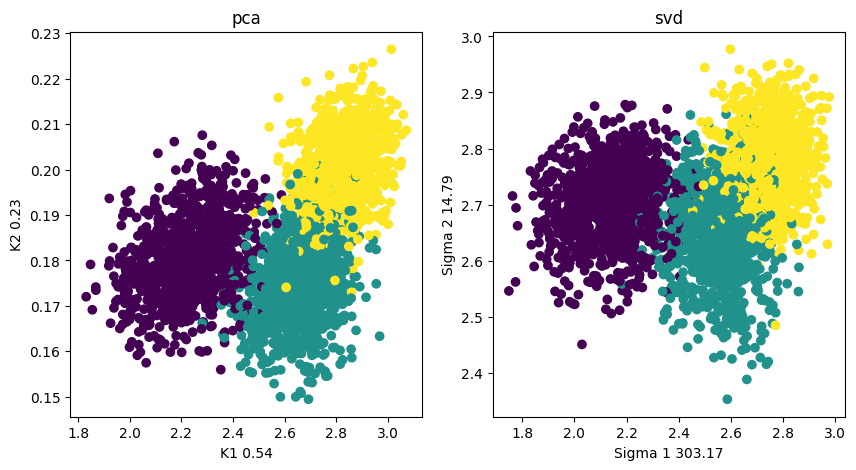

In [193]:
from sklearn.datasets import make_blobs
import numpy as np

# Simple 5D blobs: 3 clusters, 3000 samples
X,c = make_blobs(n_samples=3000, n_features=5, centers=3, random_state=42, cluster_std=1.5)
X=np.log(np.abs(X)+6)

da = DecomAnalysis(2)
da.fit(X)
pca = da.pca(X)
svd = da.svd(X)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(pca[:,0],pca[:,1],c=c)
plt.title("pca")
plt.xlabel(f"K1 {da.pca_explained_variance[0]:0.2f}")
plt.ylabel(f"K2 {da.pca_explained_variance[1]:0.2f}")

plt.subplot(1,2,2)
plt.scatter(svd[:,0],svd[:,1],c=c)
plt.xlabel(f"Sigma 1 {da._svd[1][0]:0.2f}")
plt.ylabel(f"Sigma 2 {da._svd[1][1]:0.2f}")
plt.title("svd")


Мы также определяем функцию, которая выводит информацию, чтобы мы могли сравнивать разложения.
полученные по разным алгоритмам.

## Exercises

## Упражнение

В методе обычных наименьших квадратов (OLS) мы учимся вычислять $ \hat{\beta} = (X^\top X)^{-1} X^\top y $, но бывают случаи, например, когда у нас есть коллинеарность или недоопределенная система: **короткая толстая** матрица.

В этих случаях матрица $(X^\top X)$ не является необратимой (ее определитель равен нулю) или плохо обусловленной (ее определитель очень близок к нулю).

Вместо этого мы можем создать так называемую [псевдообратную](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse), аппроксимацию инвертированной матрицы полного ранга, чтобы мы могли вычислить с ее помощью $ \hat{\beta} $.

Думая в терминах теоремы Эккарта-Янга, постройте псевдообратную матрицу $ X^{+} $ и используйте ее для вычисления $ \hat{\beta} $.

In [243]:
U,S,V = np.linalg.svd(X,full_matrices=False)

corr_approx = V.T*(S**2) @ V
corr = X.T @ X

print("Correlation matrix approximation",np.allclose(corr,corr_approx))

corr_inv=np.linalg.inv(corr)
corr_inv_approx = V.T * S**(-2) @ V

print("Correlation matrix inverse approximation",np.allclose(corr_inv,corr_inv_approx))

Correlation matrix approximation True
Correlation matrix inverse approximation True
